# Introducción a Redes Complejas en Biología de Sistemas

## Trabajo Computacional 1

### Ejercicio 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import powerlaw as powerlaw2
from scipy.stats import powerlaw as powerlaw3
from scipy import optimize
from scipy import stats

Considere la red as-22july06.gml creada por Mark Newman que contiene la estructura de los
sistemas autónomos de internet relevada a mediados de 2006.


In [3]:
G = nx.read_gml(".\\tc01_data\\as-22july06.gml")
degrees = [x[1] for x in G.degree()]
degrees_norm = list(np.array(degrees) / sum(degrees))
print ([len(degrees),max(degrees)])

[22963, 2390]


a) Encuentre gráficamente la distribución de grado Pk como función de k explorando
diferentes alternativas: un bineado lineal o logarítmico, utilizando escalas logarítmicas o
lineales en uno o ambos ejes. Discuta que alternativa permite apreciar mejor el carácter
libre de escala de dicha distribución.


<b>Bineado Lin-Lin

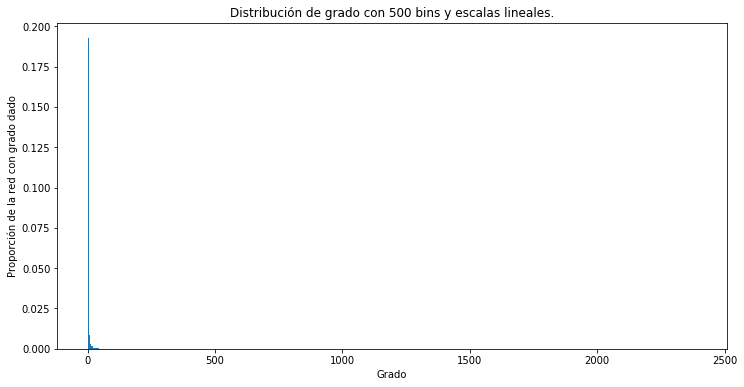

In [4]:
plt.rcParams['figure.figsize'] = (12,6)

plt.hist(degrees,bins=500, density=True)
plt.title('Distribución de grado con 500 bins y escalas lineales.')
plt.xlabel('Grado')
plt.ylabel('Proporción de la red con grado dado')
plt.show()

<b>Bineado log-lin

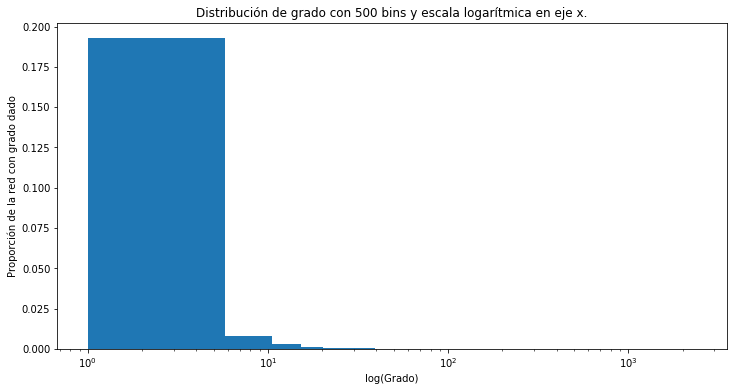

In [5]:
plt.hist(degrees, bins=500, density=True)
plt.gca().set_xscale("log")

plt.title('Distribución de grado con 500 bins y escala logarítmica en eje x.')
plt.xlabel('log(Grado)')
plt.ylabel('Proporción de la red con grado dado')
plt.show()

<b>Bineado lin-log

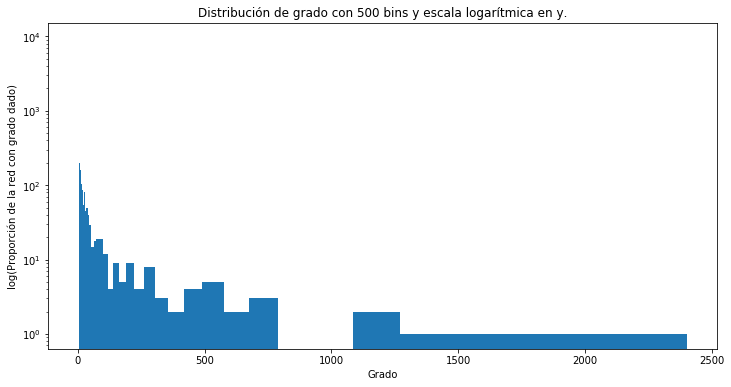

In [6]:
x = np.logspace(0,np.log10(2400), 50)
plt.figure(figsize=(12, 6))
plt.hist(degrees,  bins=x)
plt.gca().set_yscale("log")

plt.title('Distribución de grado con 500 bins y escala logarítmica en y.')
plt.xlabel('Grado')
plt.ylabel('log(Proporción de la red con grado dado)')
plt.show()

<b>Bineado log-log

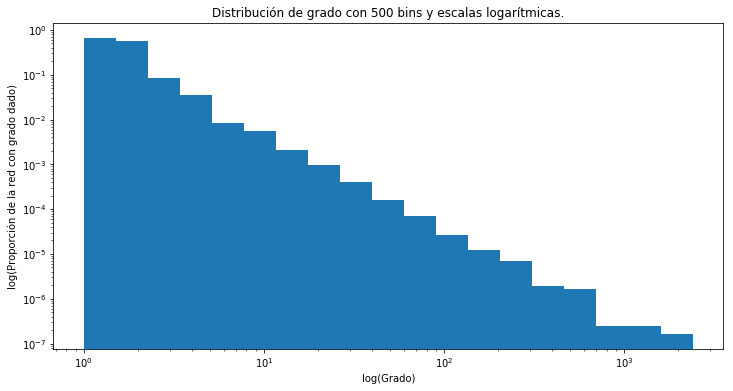

In [7]:
plt.hist(degrees,density=True, bins=np.logspace(0,np.log10(2400), 20))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")

plt.title('Distribución de grado con 500 bins y escalas logarítmicas.')
plt.xlabel('log(Grado)')
plt.ylabel('log(Proporción de la red con grado dado)')
plt.show()

<b>Comparacion entre los gráficos mostrados hasta ahora</b>

El bineado Lin-Lin no se pueden apreciar los graficos ya que los valores extremos son muy grandes y la mayoria de los datos estan al principio. El Log-Lin tampoco se aprecia mucho por que los primeros bins estan muy llenos y los ultimos casi vacios. El Lin-Log se puede apreciar ya que el eje x no es tan grande y los valores grandes de y (nodos de grado x) se ven bien en escala logaritmica. Finalmente Log-Log decrece escalonadamente como una recta, que es lo esperado para una funcion powerlaw.

b) Utilizando funcionalidad de la librería igraph, estime el exponente de dicha distribución

<b>Sin bineado

In [8]:
start = 0
dhist = np.array( nx.degree_histogram(G)[start:])
xdata = np.array(range(len(dhist))) + start
ydata = np.array(dhist)  
yerr = 0.0000001

C:\Users\l_vey\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power


Ampli = 13.60 +/-  1.92
Index = -0.37 +/-  0.05


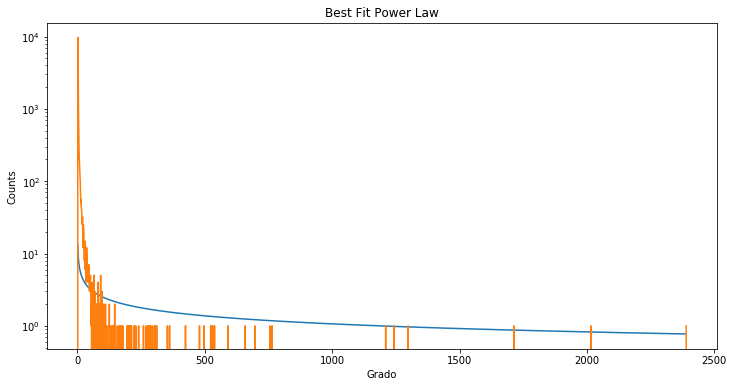

In [9]:
##########
# Fitting the data -- Least Squares Method
##########

# Power-law fitting is best done by first converting
# to a linear equation and then fitting to a straight line.
# Note that the `logyerr` term here is ignoring a constant prefactor.
#
#  y = a * x^b
#  log(y) = log(a) + b*log(x)
#

logx = np.log10(xdata + 1  )
logy = np.log10(ydata + 1  )


# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err
powerlaw = lambda x, amp, index: amp * (x**index)

pinit = [1.0,-1.0]
out = optimize.leastsq(errfunc, pinit,args=(logx, logy, 1), full_output=1)
pfinal = out[0]
covar = out[1]
# print(pfinal)
# print(covar)

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp


plt.plot(xdata, powerlaw(xdata, amp, index))     # Fit
plt.plot(xdata, ydata)  # Data

print('Ampli = %5.2f +/- %5.2f' % (amp, ampErr))
print('Index = %5.2f +/- %5.2f' % (index, indexErr))

plt.title('Best Fit Power Law')
plt.xlabel('Grado')
plt.ylabel('Counts')
plt.gca().set_yscale("log")




C:\Users\l_vey\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in power


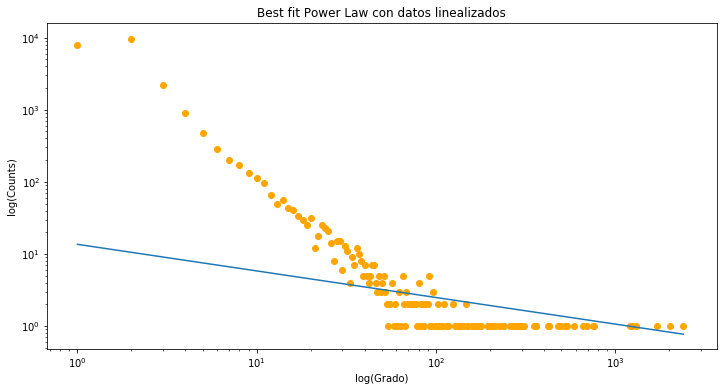

In [10]:
plt.loglog(xdata, powerlaw(xdata, amp, index))
plt.scatter(xdata, ydata, c='orange')  # Data

plt.title('Best fit Power Law con datos linealizados')
plt.xlabel('log(Grado)')
plt.ylabel('log(Counts)')
plt.show()

Sin binning, el ajuste no parece muy preciso cuando se lo ve en escala log-log.

<b>Con Bineado

y =  3.16 * x^-0.94   R2: 0.94 


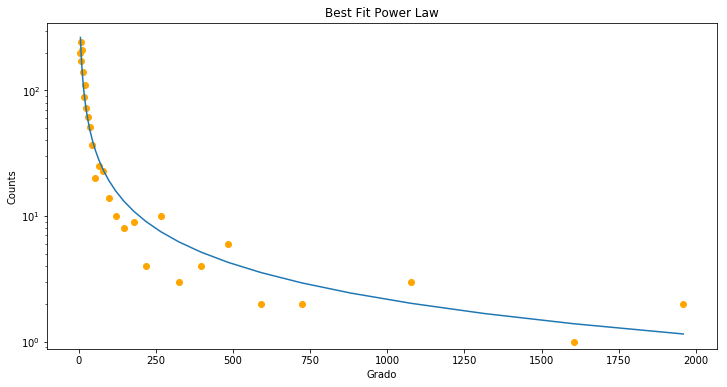

In [11]:
bins = 40
start = 9
xdata = np.logspace(0,np.log10(len(dhist) ) , bins)[:-1][start:]
ydata = np.histogram(degrees,bins= np.logspace(0,np.log10(len(dhist) ) , bins))[0][start:]

#  y = a * x^b
#  log(y) = log(a) + b*log(x)


logx = np.log10(xdata + 1  )
logy = np.log10(ydata + 1  )


# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y, err: (y - fitfunc(p, x)) / err
powerlaw = lambda x, amp, index: amp * (x**index)

pinit = [1.0,-1.0]
#out = optimize.leastsq(errfunc, pinit,args=(logx, logy, 1), full_output=1)
slope, intercept, r_value, p_value, std_err = stats.linregress(logx, logy)


c = 10.0**intercept

plt.plot(xdata, powerlaw(xdata, c, slope))     # Fit
plt.scatter(xdata, ydata,c="orange")  # Data

print('y = %5.2f * x^%5.2f   R2: %2.2f ' % (intercept,slope,r_value**2)  )


plt.title('Best Fit Power Law')
plt.xlabel('Grado')
plt.ylabel('Counts')
plt.gca().set_yscale("log")

Text(0,0.5,'log(Counts)')

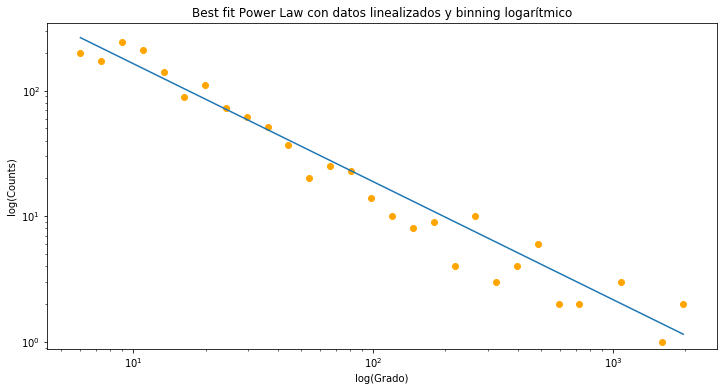

In [12]:
plt.loglog(xdata, powerlaw(xdata, c, slope))
plt.scatter(xdata, ydata, c='orange')  # Data

plt.title('Best fit Power Law con datos linealizados y binning logarítmico')
plt.xlabel('log(Grado)')
plt.ylabel('log(Counts)')

Utilizando un binning de 40, y salteandonos los primeros 9 puntos, la recta para la funcion Power Law de grados ajusta a los bins obtenidos con un R cuadrado de 0,94. El exponente de la ecuación ajustada es -0,94.